<a href="https://colab.research.google.com/github/Ni7070/K-NearestNeighbors-KNN-/blob/master/K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_knn.txt to test_knn (1).txt
Saving train_knn.txt to train_knn (1).txt


In [ ]:
df_train = pd.read_csv('train_knn.txt', sep=",", header = None,dtype='Int64')
df_train = pd.DataFrame(df_train.values, columns = ['X', 'Y', 'Class'])

In [ ]:
df_test= pd.read_csv('test_knn.txt', sep="," ,  header = None,dtype='Int64')
df_test = pd.DataFrame(df_test.values, columns = ['X', 'Y'])

In [ ]:
for j in range(0, df_test.shape[0]):
    df_train[j]=0

In [ ]:
def euclidDistance(a,b,c,d):
    return (np.power(a-b,2)+np.power(c-d,2))

In [ ]:
for i in range(0,df_test.shape[0]):
    for j in range(0, df_train.shape[0]):
        a = df_test.iloc[i,0];
        b = df_train.iloc[j,0];
        c = df_test.iloc[i,1];
        d = df_train.iloc[j,1];

        df_train.iloc[j,i+3] = euclidDistance(a,b,c,d)
while(True):
    k = int(input('Enter The value of K :'))
    if (k > df_test.shape[0]-1):
        print("K must be less than " + str(df_test.shape[0]-1))
    elif (k%2 == 0):
      print("k must be an odd number.")
      
    else : break;


Enter The value of K :3


In [ ]:
print(df_train)

    X  Y Class   0   1   2   3   4   5   6   7   8
0   7  7     1  16   0  25  26  20  61  10  17  10
1   7  4     1  25   9  10  41  17  40  25   2   1
2   6  4     1  18  10   5  32  10  29  20   5   4
3   7  5     1  20   4  13  34  16  45  18   5   2
4   7  6     1  17   1  18  29  17  52  13  10   5
5   6  7     1   9   1  20  17  13  50   5  20  13
6   6  6     1  10   2  13  20  10  41   8  13   8
7   3  4     2   9  25   2  17   1   8  17  26  25
8   2  3     2  17  41   4  25   5   2  29  36  37
9   3  2     2  25  41   2  37   9   4  37  26  29
10  4  3     2  17  25   0  29   5  10  25  16  17
11  3  3     2  16  32   1  26   4   5  26  25  26
12  4  4     2  10  18   1  20   2  13  16  17  16
13  1  4     2  13  45  10  17   5   4  25  50  49


In [ ]:
f = open("prediction.txt", "w")

In [ ]:
for i in range(0, df_test.shape[0]):

    f.write('Test Point : '+str(df_test.iloc[i,0])+','+str(df_test.iloc[i,1])+'\n')
    df_sorted = df_train.sort_values(by=[i])
    df_knn = df_sorted.iloc[0:k,[0,1,2,i+3]]

    #print(df_knn)

    for j in range(0,df_knn.shape[0]):
        f.write('Distance ' +str(j)+' : '+str(df_knn.iloc[j,3])+'     Class: '+str(df_knn.iloc[j,2])+'\n')


    clss = df_knn['Class'].value_counts(sort=True).index[0]
    df_test.loc[i,'Class'] = clss;
    f.write('Predicted class: '+str(clss)+'\n'+'\n')

f.close();

In [ ]:
df1 = df_train[df_train['Class'] == 1];
df1 = df1.iloc[:,0:2]
w1 = df1.values

df2 = df_train[df_train['Class'] == 2];
df2 = df2.iloc[:,0:2]
w2 = df2.values

df1 = df_test[df_test['Class'] == 1];
df1 = df1.iloc[:,0:2]
w3 = df1.values

df2 = df_test[df_test['Class'] == 2];
df2 = df2.iloc[:,0:2]
w4 = df2.values

<Figure size 432x288 with 0 Axes>

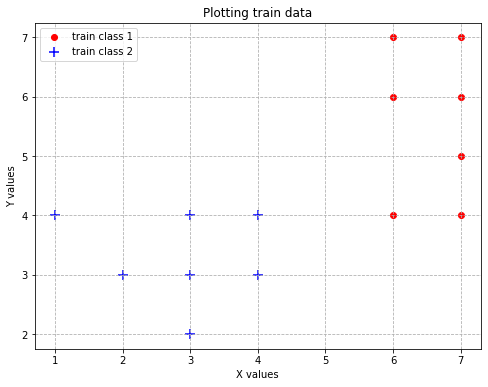

In [ ]:
plt.figure(0);
fig, ax = plt.subplots(1, figsize = (8, 6))
plt.grid(linestyle="--")

plt.scatter(w1[:,0],w1[:,1],color = 'red', marker = 'o',label="train class 1")
plt.scatter(w2[:,0],w2[:,1],color = 'blue', marker = '+', s=100, label="train class 2")
plt.title('Plotting train data')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(loc="best")
plt.show()

<Figure size 432x288 with 0 Axes>

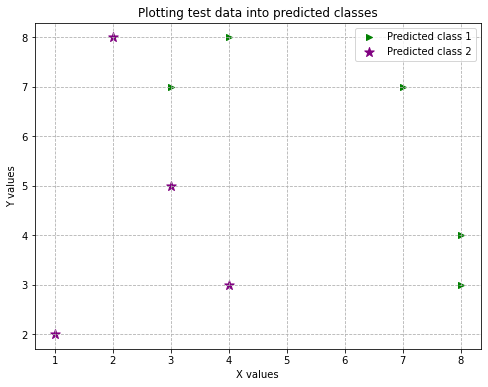

In [ ]:
plt.figure(0);
fig, ax = plt.subplots(1, figsize = (8, 6))
plt.grid(linestyle="--")

plt.scatter(w3[:,0],w3[:,1],color = 'green', marker = '>',label="Predicted class 1")
plt.scatter(w4[:,0],w4[:,1],color = 'purple', marker = '*', s=100, label="Predicted class 2")
plt.title('Plotting test data into predicted classes')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(loc="best")
plt.show()